### How does Git store information?

1. "A **commit** contains metadata such as the author, the commit message, and the time the commit happened. In the diagram below, the most recent commit is at the bottom (feed0098), and vertical arrows point up towards the previous ("parent") commits."

2. "Each commit also has a **tree**, which tracks the names and locations in the repository when that commit happened. In the oldest (top) commit, there were two files tracked by the repository."

3. "For each of the files listed in the tree, there is a **blob**. This contains a compressed snapshot of the contents of the file when the commit happened. (Blob is short for binary large object, which is a SQL database term for 'may contain data of any kind'.) In the middle commit, report.md and draft.md were changed, so the blobs are shown next to that commit. *data/northern.csv* didn't change in that commit, so the tree links to the blob from the previous commit. Reusing blobs between commits help make common operations fast and minimizes storage space."

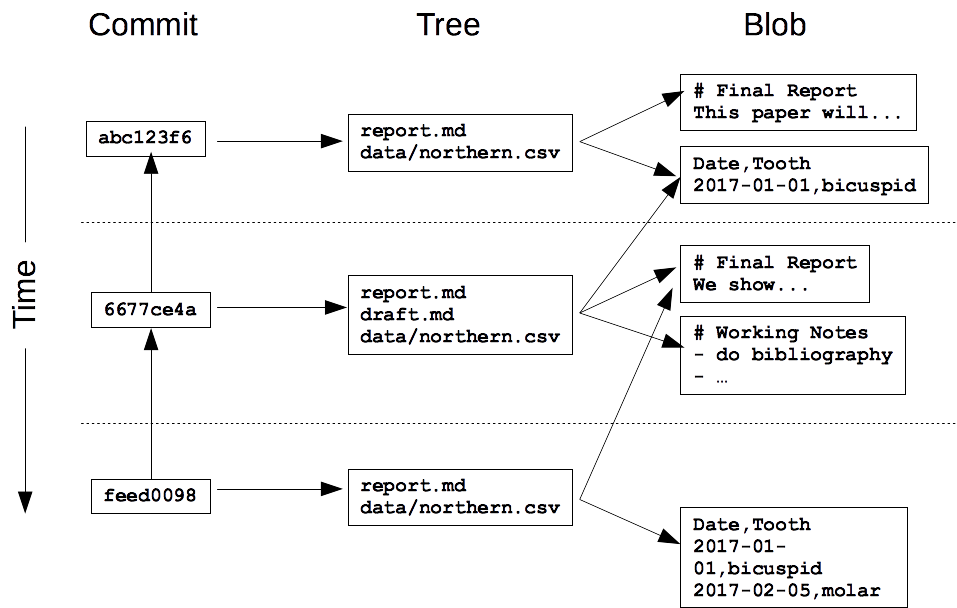

In [1]:
from IPython.display import Image
Image('commit-tree-blob.png')

### How can I commit changes selectively?

You don't have to put all of the changes you have made recently into the staging area at once. For example, suppose you are adding a feature to *analysis.R* and spot a bug in *cleanup.R*. After you have fixed it, you want to save your work. Since the changes to cleanup.R aren't directly related to the work you're doing in analysis.R, you should save your work in two separate commits.

The syntax for staging a single file is *git add path/to/file*.

If you make a mistake and accidentally stage a file you shouldn't have, you can unstage the additions with *git reset HEAD* and try again.

### How do I re-stage files?

People often save their work every few minutes when they're using a desktop text editor. Similarly, it's common to use git add periodically to save the most recent changes to a file to the staging area. This is particularly useful when the changes are experimental and you might want to undo them without cluttering up the repository's history.

### How can I undo changes to unstaged files?

Suppose you have made changes to a file, then decide you want to undo them. Your text editor may be able to do this, but a more reliable way is to let Git do the work. The command:

~~~
git checkout -- filename
~~~

will discard the changes that have not yet been staged. (The double dash -- must be there to separate the git checkout command from the names of the file or files you want to recover.)

**Use this command carefully: once you discard changes in this way, they are gone forever.**

### How can I undo changes to staged files?

At the start of this chapter you saw that *git reset* will unstage files that you previously staged using *git add*. By combining *git reset* with *git checkout*, you can undo changes to a file that you staged changes to. The syntax is as follows.

~~~
git reset HEAD path/to/file
git checkout -- path/to/file
~~~

(You may be wondering why there are two commands for re-setting changes. The answer is that unstaging a file and undoing changes are both special cases of more powerful Git operations that you have not yet seen.)

### How do I restore an old version of a file?

You previously saw how to use *git checkout* to undo the change that you made since the last commit. This command can also be used to go back even further into a file's history and restore versions of that file from a commit. In this way, you can think of committing as saving your work, and checking out as loading that saved version.

The syntax for restoring an old version takes two arguments: the hash that identifies the version you want to restore, and the name of the file.

For example, if *git log* shows this:

~~~
commit ab8883e8a6bfa873d44616a0f356125dbaccd9ea
Author: Author: Rep Loop <repl@datacamp.com>
Date:   Thu Oct 19 09:37:48 2017 -0400

    Adding graph to show latest quarterly results.

commit 2242bd761bbeafb9fc82e33aa5dad966adfe5409
Author: Author: Rep Loop <repl@datacamp.com>
Date:   Thu Oct 16 09:17:37 2017 -0400

    Modifying the bibliography format.
~~~

then *git checkout 2242bd report.txt* would replace the current version of *report.txt* with the version that was committed on October 16. Notice that this is the same syntax that you used to undo the unstaged changes, except *--* has been replaced by a hash.

Restoring a file doesn't erase any of the repository's history. Instead, the act of restoring the file is saved as another commit, because you might later want to undo your undoing.

One more thing: there's another feature of *git log* that will come in handy here. Passing *-* then a number restricts the output to that many commits. For example, *git log -3 report.txt* shows you the last three commits involving *report.txt*.

### How can I undo all of the changes I have made?

So far, you have seen how to undo changes to a single file at a time using *git reset HEAD path/to/file*. You will sometimes want to undo changes to many files.

One way to do this is to give *git reset* a directory. For example, *git reset HEAD data* will unstage any files from the data directory. Even better, if you don't provide any files or directories, it will unstage everything. Even even better, HEAD is the default commit to unstage, so you can simply write *git reset* to unstage everything.

Similarly *git checkout -- data* will then restore the files in the data directory to their previous state. You can't leave the file argument completely blank, but recall from Introduction to Shell for Data Science that you can refer to the current directory as '.' . So git checkout -- . will revert all files in the current directory.

### What is a branch?

If you don't use version control, a common workflow is to create different subdirectories to hold different versions of your project in different states, for example development and final. Of course, then you always end up with final-updated and final-updated-revised as well. The problem with this is that it becomes difficult to work out if you have the right version of each file in the right subdirectory, and you risk losing work.


One of the reasons Git is popular is its support for creating branches, which allows you to have multiple versions of your work, and lets you track each version systematically.


Each branch is like a parallel universe: changes you make in one branch do not affect other branches (until you merge them back together).


*Note*: Chapter 2 described the three-part data structure Git uses to record a repository's history: blobs for files, trees for the saved states of the repositories, and commits to record the changes. Branches are the reason Git needs both trees and commits: a commit will have two parents when branches are being merged.

### How can I see what branches my repository has?

By default, every Git repository has a branch called master (which is why you have been seeing that word in Git's output in previous lessons). To list all of the branches in a repository, you can run the command git branch. The branch you are currently in will be shown with a * beside its name.

### How can I view the differences between branches?

Branches and revisions are closely connected, and commands that work on the latter usually work on the former. For example, just as git diff revision-1..revision-2 shows the difference between two versions of a repository, git diff branch-1..branch-2 shows the difference between two branches.

### How can I switch from one branch to another?

You previously used git checkout with a commit hash to switch the repository state to that hash. You can also use git checkout with the name of a branch to switch to that branch.


Two notes:

When you run git branch, it puts a * beside the name of the branch you are currently in.
Git will only let you do this if all of your changes have been committed. You can get around this, but it is outside the scope of this course.
In this exercise, you'll also make use of git rm. This removes the file (just like the shell command rm) then stages the removal of that file with git add, all in one step.

### How can I create a branch?

You might expect that you would use git branch to create a branch, and indeed this is possible. However, the most common thing you want to do is to create a branch then switch to that branch.

In the previous exercise, you used git checkout branch-name to switch to a branch. To create a branch then switch to it in one step, you add a -b flag, calling git checkout -b branch-name,

The contents of the new branch are initially identical to the contents of the original. Once you start making changes, they only affect the new branch.

### How can I merge two branches?

Branching lets you create parallel universes; **merging** is how you bring them back together. When you merge one branch (call it the source) into another (call it the destination), Git incorporates the changes made to the source branch into the destination branch. If those changes don't overlap, the result is a new commit in the destination branch that includes everything from the source branch. (The next exercises describes what happens if there are conflicts.)

To merge two branches, you run git merge source destination (without .. between the two branch names). Git automatically opens an editor so that you can write a log message for the merge; you can either keep its default message or fill in something more informative.

### What are conflicts?

Sometimes the changes in two branches will conflict with each other: for example, bug fixes might touch the same lines of code, or analyses in two different branches may both append new (and different) records to a summary data file. In this case, Git relies on you to reconcile the conflicting changes.

### How can I merge two branches with conflicts?

When there is a conflict during a merge, Git tells you that there's a problem, and running git status after the merge reminds you which files have conflicts that you need to resolve by printing both modified: beside the files' names.

Inside the file, Git leaves markers that look like this to tell you where the conflicts occurred:

~~~
<<<<<<< destination-branch-name
...changes from the destination branch...
=======
...changes from the source branch...
>>>>>>> source-branch-name
~~~

(In many cases, the destination branch name will be HEAD, because you will be merging into the current branch.) To resolve the conflict, edit the file to remove the markers and make whatever other changes are needed to reconcile the changes, then commit those changes.

### How can I create a brand new repository?

So far, you have been working with repositories that we created. If you want to create a repository for a new project, you can simply say git init project-name, where "project-name" is the name you want the new repository's root directory to have.

One thing you should not do is create one Git repository inside another. While Git does allow this, updating nested repositories becomes very complicated very quickly, since you need to tell Git which of the two .git directories the update is to be stored in. Very large projects occasionally need to do this, but most programmers and data analysts try to avoid getting into this situation.

### How can I turn an existing project into a Git repository?

Experienced Git users instinctively start new projects by creating repositories. If you are new to Git, though, or working with people who are, you will often want to convert existing projects into repositories. Doing so is simple: just run

~~~
git init
~~~

in the project's root directory, or

~~~
git init /path/to/project
~~~

from anywhere else on your computer.

### How can I create a copy of an existing repository?

Sometimes you will join a project that is already running, inherit a project from someone else, or continue working on one of your own projects on a new machine. In each case, you will clone an existing repository instead of creating a new one. Cloning a repository does exactly what the name suggests: it creates a copy of an existing repository (including all of its history) in a new directory.

To clone a repository, use the command git clone URL, where URL identifies the repository you want to clone. This will normally be something like

~~~
https://github.com/datacamp/project.git
~~~

but for this lesson, we will use a repository on the local file system, so you can just use a path to that directory.

When you clone a repository, Git uses the name of the existing repository as the name of the clone's root directory: for example,

~~~
git clone /existing/project
~~~

will create a new directory called project. If you want to call the clone something else, add the directory name you want to the command:

~~~
git clone /existing/project newprojectname
~~~

### How can I find out where a cloned repository originated?

When you a clone a repository, Git remembers where the original repository was. It does this by storing a remote in the new repository's configuration. A remote is like a browser bookmark with a name and a URL.

If you use an online git repository hosting service like GitHub or Bitbucket, a common task would be that you clone a repository from that site to work locally on your computer. Then the copy on the website is the remote.

If you are in a repository, you can list the names of its remotes using git remote.

If you want more information, you can use git remote -v (for "verbose"), which shows the remote's URLs. Note that "URLs" is plural: it's possible for a remote to have several URLs associated with it for different purposes, though in practice each remote is almost always paired with just one URL.


### How can I define remotes?

When you clone a repository, Git automatically creates a remote called origin that points to the original repository. You can add more remotes using:

~~~
git remote add remote-name URL
~~~

and remove existing ones using:

~~~
git remote rm remote-name
~~~

You can connect any two Git repositories this way, but in practice, you will almost always connect repositories that share some common ancestry.

### How can I pull in changes from a remote repository?

Git keeps track of remote repositories so that you can pull changes from those repositories and push changes to them.

Recall that the remote repository is often a repository in an online hosting service like GitHub. A typical workflow is that you pull in your collaborators' work from the remote repository so you have the latest version of everything, do some work yourself, then push your work back to the remote so that your collaborators have access to it.

Pulling changes is straightforward: the command git pull remote branch gets everything in branch in the remote repository identified by remote and merges it into the current branch of your local repository. For example, if you are in the quarterly-report branch of your local repository, the command:

~~~
git pull thunk latest-analysis
~~~

would get changes from latest-analysis branch in the repository associated with the remote called thunk and merge them into your quarterly-report branch.

### What happens if I try to pull when I have unsaved changes?

Just as Git stops you from switching branches when you have unsaved work, it also stops you from pulling in changes from a remote repository when doing so might overwrite things you have done locally. The fix is simple: either commit your local changes or revert them, and then try to pull again.

### How can I push my changes to a remote repository?

The complement of git pull is git push, which pushes the changes you have made locally into a remote repository. The most common way to use it is:

~~~
git push remote-name branch-name
~~~

which pushes the contents of your branch branch-name into a branch with the same name in the remote repository associated with remote-name. It's possible to use different branch names at your end and the remote's end, but doing this quickly becomes confusing: it's almost always better to use the same names for branches across repositories.

### What happens if my push conflicts with someone else's work?

Overwriting your own work by accident is bad; overwriting someone else's is worse.

To prevent this happening, Git does not allow you to push changes to a remote repository unless you have merged the contents of the remote repository into your own work.